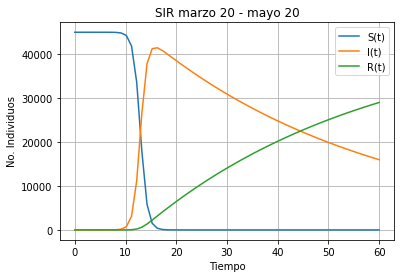

Tabla de solución del mes de marzo 20 – mayo 20
Dia Susceptibles Infectados Recuperados
1 44999.999777777775 0.00022222222222222223 1.5
2 44999.99899000085 0.0009984450848313233 1.5000115540617134
3 44999.99546031785 0.004476359402430082 1.5000633227488853
4 44999.9796004142 0.020103651060978174 1.5002959347338685
5 44999.90820169763 0.09045518502502614 1.5013431173382914
6 44999.58717466428 0.4067737922374971 1.5060515434802222
7 44998.146459092444 1.8263583251565376 1.5271825823946032
8 44991.67913125512 8.198821409346795 1.6220473355209104
9 44962.67967233593 36.77274349618674 2.047584167874079
10 44832.89700823017 164.64767458992796 3.9553171798907307
11 44258.5421714203 730.4925632662607 12.465265313429992
12 41850.51983649991 3101.5715846426565 49.408578857424445
13 33635.24479560311 11172.77471774596 193.48048665091926
14 17879.166749740136 26512.650187033996 609.6830632258487
15 5846.666527112548 37808.76548358986 1346.0679892975777
16 1505.9329523588253 41254.96543343628 2240.

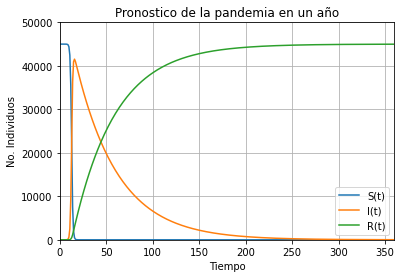

Punto 3: Dia con mayor contagios:
16
Cantidad de contagios el dia 16:
41534.93209688338


In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

# ----------Susceptible - Infectado - Recuperado-----------
def modelo_SIR(y, tasaInfec, tasaRecup, tiempoMax):
  # s: Población susceptible
  # i: Población infectada
  # r: Población recuperada
  # n: (implícito) conjunto de s, i, r (s+i+r)
  dS_dt = -tasaInfec * s * i / (s + i + r)
  dI_dt = tasaInfec * s * i / (s + i + r) - (tasaRecup * i)
  dR_dt = tasaRecup * i
  return([dS_dt, dI_dt, dR_dt])

# Datos iniciales:
# N: Población de
N = 45000
I0 = 10/N
# S0: N (población de Santa Marta) - I0 (primer infectado)
S0 = N - I0
# R0: Número inicial de Recuperados (NO CONFUNDIR CON NÚMERO DE REPRODUCCIÓN)
R0  = 1.5
#= 0ec
tasaRecup = 0.022

B = 0.06
C = 1.5
Y = 0.021

# t: 60 días (2 meses)
# Tercer parámetro total de muestras en el rango 0 - 60 (parámetro 2)
tSIR = np.linspace(0, 60, 60)

# Solución con MÉTODO: Runge-Kutta de Orden 4
# Basado en:
# http://acme.byu.edu/wp-content/uploads/2020/09/SIR2020.pdf


def ode_SIR(t, y):
  return np.array([-tasaInfec*y[0]*y[1]/N, (tasaInfec*y[0]*y[1]/N)-tasaRecup*y[1], tasaRecup*y[1]])

# -----------------Punto 1-------------------------------
sol_SIR2 = solve_ivp(ode_SIR, [tSIR[0], tSIR[-1]], [S0, I0, R0], method = "RK45", t_eval = tSIR,dense_output=True)

#print(sol_SIR2)
# Gráfica

plt.figure(figsize = [6, 4])
plt.plot(sol_SIR2.t, sol_SIR2.y[0], label = "S(t)")
plt.plot(sol_SIR2.t, sol_SIR2.y[1], label = "I(t)")
plt.plot(sol_SIR2.t, sol_SIR2.y[2], label = "R(t)")
plt.grid()
plt.legend()
plt.title("SIR marzo 20 - mayo 20")
plt.xlabel("Tiempo")
plt.ylabel("No. Individuos")
plt.show()

print("Tabla de solución del mes de marzo 20 – mayo 20")

print('Dia','Susceptibles','Infectados','Recuperados')
for i in range(len(tSIR)):
  print(i+1,sol_SIR2.y[0][i], sol_SIR2.y[1][i], sol_SIR2.y[2][i])

t1SIR = np.linspace(0, 365, 365)

# -----------------Punto 2-------------------------------
print("Pronostico de la pandemia en un año")
sol_SIR3 = solve_ivp(ode_SIR, [t1SIR[0], t1SIR[-1]], [S0, I0, R0], method = "RK45", t_eval = t1SIR)

#plt.figure(figsize = [6, 4])
plt.axis([0, 360, 0, 50000])
plt.plot(sol_SIR3.t, sol_SIR3.y[0], label = "S(t)")
plt.plot(sol_SIR3.t, sol_SIR3.y[1], label = "I(t)")
plt.plot(sol_SIR3.t, sol_SIR3.y[2], label = "R(t)")
plt.grid()
plt.legend()
plt.title("Pronostico de la pandemia en un año")
plt.xlabel("Tiempo")
plt.ylabel("No. Individuos")
plt.show()

# Tasas de modelo pronóstico:
# Manrique-Abril, et al.
# tasaInfec ≠ porcentaje
#tasaInf

#------------------Punto 3----------------------------

diaMayorContagios=0
cantidadContagios = 0
for i in range(len(sol_SIR3.y[1])):
  if(sol_SIR3.y[1][i] > cantidadContagios ):
    diaMayorContagios = i
    cantidadContagios =  sol_SIR3.y[1][i]

print("Punto 3: Dia con mayor contagios:")
print(diaMayorContagios)
print("Cantidad de contagios el dia 16:")
print(cantidadContagios)
      
  




